In [93]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
sns.set()

In [94]:
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [95]:
train_data.info

<bound method DataFrame.info of       Unnamed: 0                              Name    Location  Year  \
0              0            Maruti Wagon R LXI CNG      Mumbai  2010   
1              1  Hyundai Creta 1.6 CRDi SX Option        Pune  2015   
2              2                      Honda Jazz V     Chennai  2011   
3              3                 Maruti Ertiga VDI     Chennai  2012   
4              4   Audi A4 New 2.0 TDI Multitronic  Coimbatore  2013   
...          ...                               ...         ...   ...   
6014        6014                  Maruti Swift VDI       Delhi  2014   
6015        6015          Hyundai Xcent 1.1 CRDi S      Jaipur  2015   
6016        6016             Mahindra Xylo D4 BSIV      Jaipur  2012   
6017        6017                Maruti Wagon R VXI     Kolkata  2013   
6018        6018             Chevrolet Beat Diesel   Hyderabad  2011   

      Kilometers_Driven Fuel_Type Transmission Owner_Type     Mileage  \
0                 72000       

In [96]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [97]:
train_data = train_data.iloc[:,1:]
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [98]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [99]:
train_data = train_data[train_data['Mileage'].notna()]
train_data = train_data[train_data['Engine'].notna()]
train_data = train_data[train_data['Power'].notna()]
train_data = train_data[train_data['Seats'].notna()]
train_data.shape

(5975, 13)

In [100]:
train_data = train_data.reset_index(drop = True)

#Feature Engineering

In [101]:
for i in range (train_data.shape[0]):
    train_data.at[i,'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [102]:
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)

In [103]:
train_data['Power(bhp)'][76]

'null'

In [104]:
x = 'n'
count = 0
position =[]
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i] == 'null' :
        x = 'Y'
        count = count + 1
        position.append(i)
print(x)
print(count)
print(position)

Y
103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [105]:
train_data = train_data.drop(train_data.index[position])
train_data = train_data.reset_index(drop = True)

In [106]:
train_data.shape

(5872, 17)

In [107]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [108]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80


In [109]:
for i in range (train_data.shape[0]):
    if pd.isnull(train_data.loc[i, 'New_Price']) == False:
        train_data.at[i, 'New_car_Price'] = train_data['New_Price'][i].split()[0]

In [110]:
train_data['New_car_Price']= train_data['New_car_Price'].astype(float)

In [111]:
train_data.drop(["Name"], axis = 1, inplace= True)
train_data.drop(['Mileage'], axis = 1, inplace = True)
train_data.drop(['Engine'], axis = 1, inplace = True)
train_data.drop(['Power'], axis =1, inplace = True)
train_data.drop(['New_Price'], axis = 1, inplace = True)

#Working with Categorical Data

In [112]:
var = 'Location'
train_data[var].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [113]:
Location = train_data[[var]]
Location = pd.get_dummies(Location, drop_first = True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [114]:
var = 'Fuel_Type'
train_data[var].value_counts()

Diesel    3152
Petrol    2655
CNG         55
LPG         10
Name: Fuel_Type, dtype: int64

In [115]:
Fuel_t = train_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t, drop_first = True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


In [116]:
var = 'Transmission'
train_data[var].value_counts()

Manual       4170
Automatic    1702
Name: Transmission, dtype: int64

In [117]:
Transmission = train_data[[var]]
Transmission = pd.get_dummies(Transmission, drop_first = True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


In [118]:
var = 'Owner_Type'
train_data[var].value_counts()

First             4839
Second             925
Third              101
Fourth & Above       7
Name: Owner_Type, dtype: int64

In [119]:
train_data.replace({"First" : 1, "Second" : 2, "Third" : 3, "Fourth & Above" : 4}, inplace = True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


In [120]:
var = 'Company'
train_data[var].head()

0     Maruti
1    Hyundai
2      Honda
3     Maruti
4       Audi
Name: Company, dtype: object

In [121]:
train_data.drop(["Company"],axis=1,inplace=True)

In [124]:
final_train = pd.concat([train_data, Location, Fuel_t, Transmission], axis = 1)
final_train.drop(['Location', 'Fuel_Type', 'Transmission', 'New_car_Price'], axis = 1, inplace = True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [125]:
test_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [126]:
test_data = test_data.iloc[:,1:]

print("Shape of test data Before dropping any Row: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
print("Shape of test data After dropping Rows with NULL values in Mileage: ",test_data.shape)
test_data = test_data[test_data['Engine'].notna()]
print("Shape of test data After dropping Rows with NULL values in Engine : ",test_data.shape)
test_data = test_data[test_data['Power'].notna()]
print("Shape of test data After dropping Rows with NULL values in Power  : ",test_data.shape)
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data After dropping Rows with NULL values in Seats  : ",test_data.shape)
print('Droping null done')

test_data = test_data.reset_index(drop=True)
print('Index reset done')

for i in range(test_data.shape[0]):
    test_data.at[i, 'Mileage(km/kg)'] = test_data['Mileage'][i].split()[0]
    test_data.at[i, 'Engine(CC)'] = test_data['Engine'][i].split()[0]
    test_data.at[i, 'Power(bhp)'] = test_data['Power'][i].split()[0]
print('Split Done') 

test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)
print('casting 1 Done') 

position = []
for i in range(test_data.shape[0]):
    if test_data['Power(bhp)'][i]=='null':
        position.append(i)
        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)
print('casting 2 Done') 

for i in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[i,'New_Price']) == False:
        test_data.at[i,'New_car_Price'] = test_data['New_Price'][i].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

var = 'Location'
Location = test_data[[var]]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
test_data.head()

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)
final_test.head()

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_test.head()

print("Final Test Size: ",final_test.shape)

Shape of test data Before dropping any Row:  (5872, 12)
Shape of test data After dropping Rows with NULL values in Mileage:  (1234, 12)
Shape of test data After dropping Rows with NULL values in Engine :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Power  :  (1224, 12)
Shape of test data After dropping Rows with NULL values in Seats  :  (1223, 12)
Droping null done
Index reset done
Split Done
casting 1 Done
casting 2 Done
Final Test Size:  (1201, 21)


In [127]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [128]:
y = final_train.loc[:,['Price']]
y.head()

,Price
0,1.75
1,12.50
2,4.50
3,6.00
4,17.74


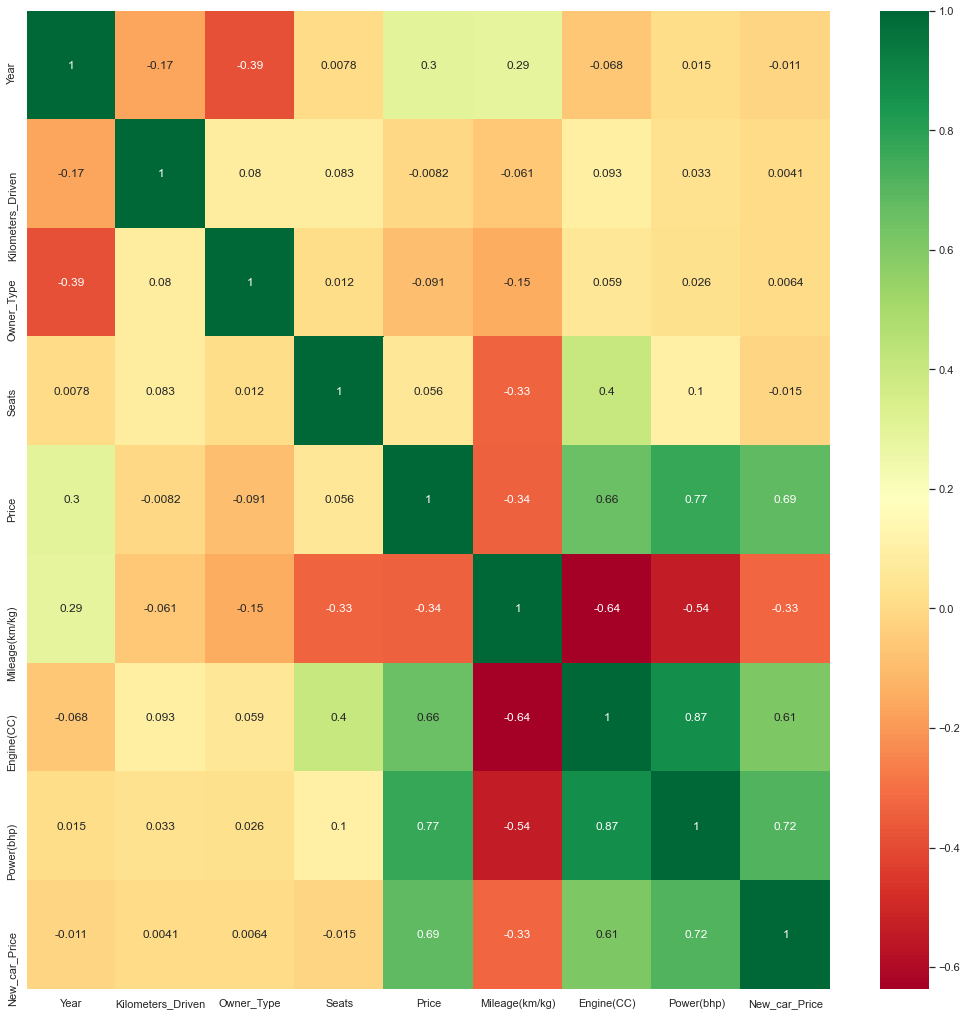

In [129]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

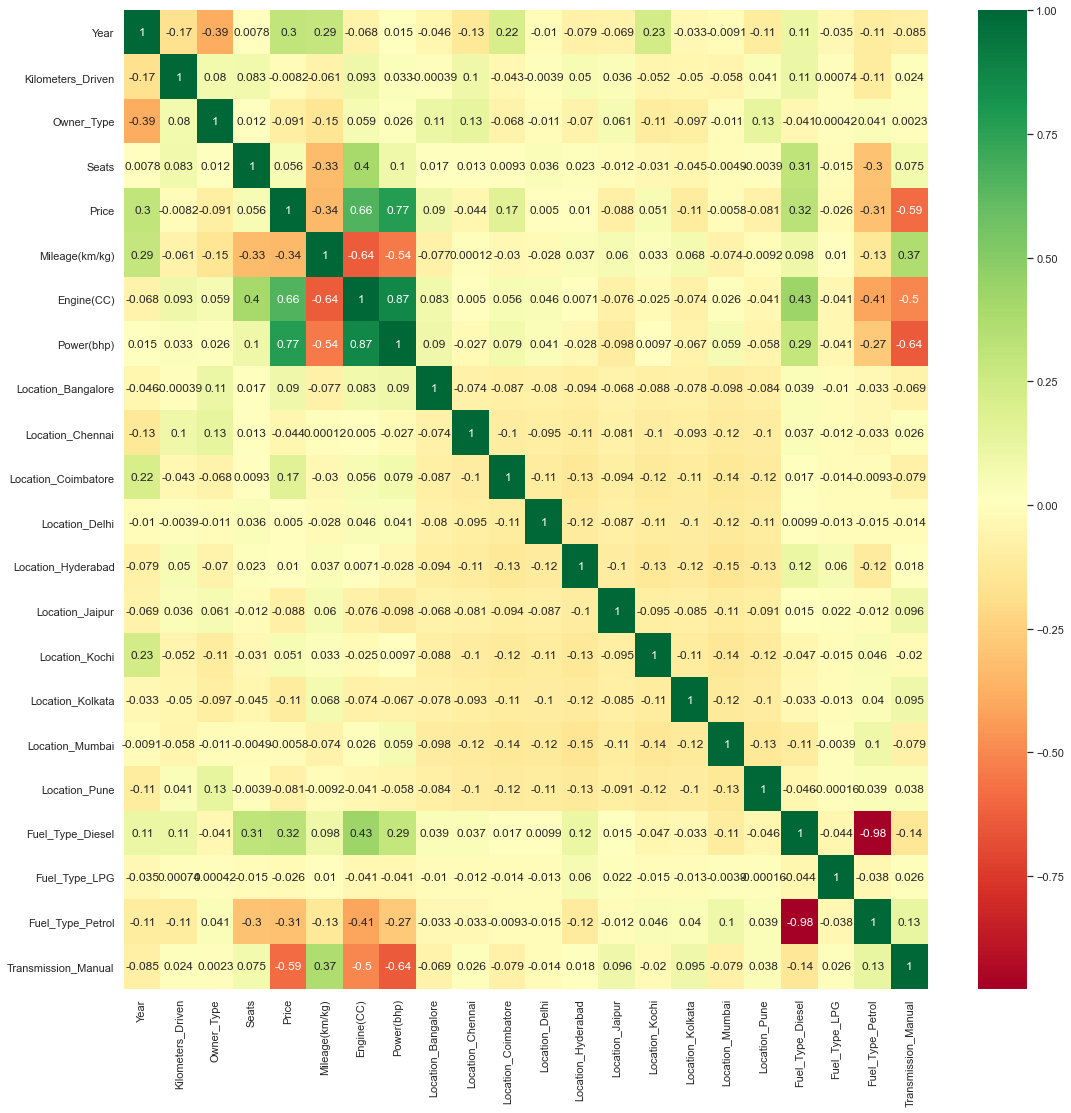

In [131]:
plt.figure(figsize=(18,18))
sns.heatmap(final_train.corr(),annot = True, cmap='RdYlGn')
plt.show

In [136]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-136-ea737cffebd8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

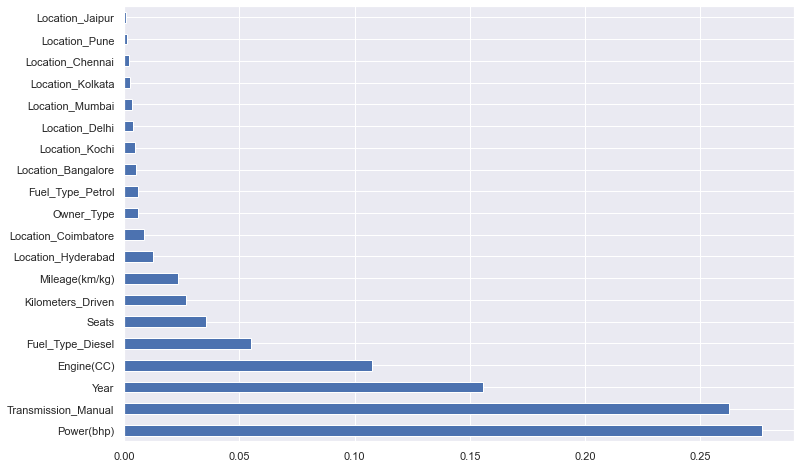

In [137]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index= X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [141]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
print("Accuracy on Traing set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))

<ipython-input-141-af29da2a34ab>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train, y_train)


Accuracy on Traing set:  0.984254982947287
Accuracy on Testing set:  0.9056039705565863
